## cvtColor（） 颜色空间转换

Converts an image from one color space to another.  
将图像从一个颜色空间转换为另一个颜色空间。


The function converts an input image from one color space to another. In case of a transformation to-from RGB color space, the order of the channels should be specified explicitly (RGB or BGR). Note that the default color format in OpenCV is often referred to as RGB but it is actually BGR (the bytes are reversed). So the first byte in a standard (24-bit) color image will be an 8-bit Blue component, the second byte will be Green, and the third byte will be Red. The fourth, fifth, and sixth bytes would then be the second pixel (Blue, then Green, then Red), and so on.

The conventional ranges for R, G, and B channel values are:

0 to 255 for CV_8U images
0 to 65535 for CV_16U images
0 to 1 for CV_32F images
In case of linear transformations, the range does not matter. But in case of a non-linear transformation, an input RGB image should be normalized to the proper value range to get the correct results, for example, for RGB → L*u*v* transformation. For example, if you have a 32-bit floating-point image directly converted from an 8-bit image without any scaling, then it will have the 0..255 value range instead of 0..1 assumed by the function. So, before calling cvtColor , you need first to scale the image down:

img *= 1./255;  
cvtColor(img, img, COLOR_BGR2Luv);  

If you use cvtColor with 8-bit images, the conversion will have some information lost. For many applications, this will not be noticeable but it is recommended to use 32-bit images in applications that need the full range of colors or that convert an image before an operation and then convert back.

If conversion adds the alpha channel, its value will set to the maximum of corresponding channel range: 255 for CV_8U, 65535 for CV_16U, 1 for CV_32F.  

  
  Parameters
- src	input image: 8-bit unsigned, 16-bit unsigned ( CV_16UC... ), or single-precision floating-point.
- dst	output image of the same size and depth as src.
- code	color space conversion code (see ColorConversionCodes).
- dstCn	number of channels in the destination image; if the parameter is 0, the number of the channels is derived automatically from src and code.
  

dst	=	cv.cvtColor(	src, code[, dst[, dstCn]]	)

In [11]:
import cv2
import matplotlib.pyplot as plt

In [12]:
img = cv2.imread("image/StitchingPipeline.jpg")

In [15]:
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

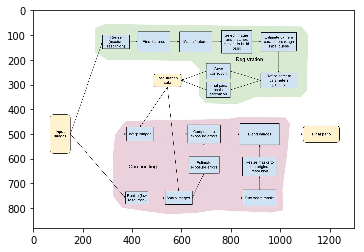

In [16]:
plt.imshow(img)

--- 

## warpPerspective() 将透视变换应用于图像

Applies a perspective transformation to an image.

The function warpPerspective transforms the source image using the specified matrix:
    
    
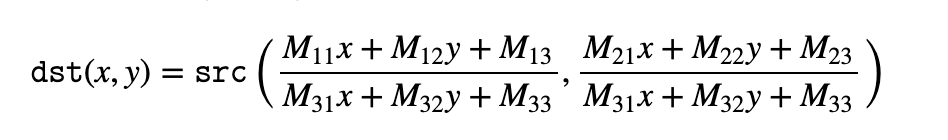

  
  Parameters
- src	input image.
- dst	output image that has the size dsize and the same type as src .
- M	3×3 transformation matrix.
- dsize	size of the output image.
- flags	combination of interpolation methods (INTER_LINEAR or INTER_NEAREST) and the optional flag WARP_INVERSE_MAP, that sets M as the inverse transformation ( 𝚍𝚜𝚝→𝚜𝚛𝚌 ).
- borderMode	pixel extrapolation method (BORDER_CONSTANT or BORDER_REPLICATE).
- borderValue	value used in case of a constant border; by default, it equals 0.  

  
dst	=	cv.warpPerspective(	src, M, dsize[, dst[, flags[, borderMode[, borderValue]]]]	)


    

---

## 使用 cv2.Stitcher_create() 里 stitch() 无缝合并两张图片

These functions try to stitch the given images.  
  
Parameters  
- images	Input images.
- masks	Masks for each input image specifying where to look for keypoints (optional).
- pano	Final pano.  
  
Python:  
retval, pano	=	cv.Stitcher.stitch(	images[, pano]	)  
retval, pano	=	cv.Stitcher.stitch(	images, masks[, pano]	)  

In [57]:
import cv2
import matplotlib.pyplot as plt

In [66]:
img_1 = cv2.imread('image1/1.jpeg')

In [67]:
img_2 = cv2.imread('image1/2.jpeg')

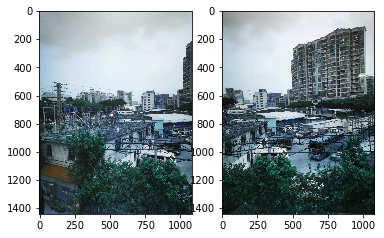

In [68]:
plt.subplot(121)
plt.imshow(img_1)
plt.subplot(122)
plt.imshow(img_2)
plt.show()

In [61]:
img_all = []
img_all.append(img_1)
img_all.append(img_2)

In [62]:
(status, stitched) = cv2.Stitcher_create().stitch(img_all)

In [63]:
print(status)

0


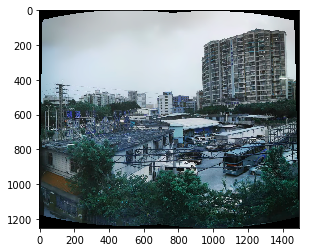

In [64]:
plt.imshow(stitched)

---